# Trevor Taylor


Homework:
Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Part 1: Forward Difference

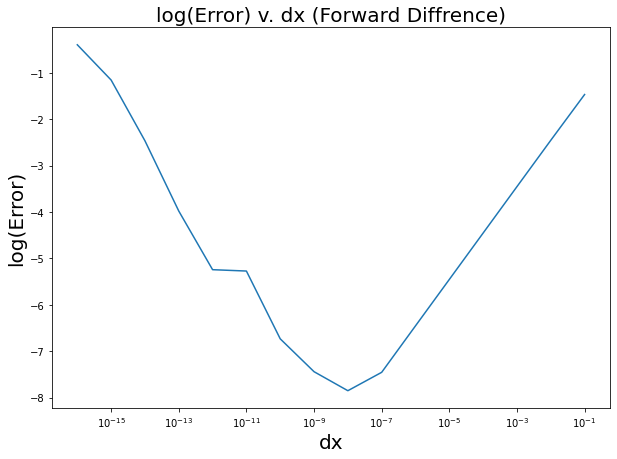

In [5]:
def forwardDifference(f, x, dx):
    return (f(x+dx)-f(x))/dx

def error(analytic, numerical):
    return math.log10(np.abs(analytic - numerical))

evalPoint = np.pi/4

x = np.logspace(-16,-1,16)
y = forwardDifference(np.cos, evalPoint, x)
error = np.log10(np.abs(y + np.sin(evalPoint)))

font = 20
plt.figure(figsize = (10, 7))
plt.title('log(Error) v. dx (Forward Diffrence)', size = font)
plt.ylabel('log(Error)', size = font)
plt.xlabel('dx', size = font)
plt.xscale('log')
plt.plot(x, error) 
plt.show()

We can find n by determining the slope of the section to the right of the minimum since to the right there is error from dx being to large, but on the left there is error due to subtracting two small numbers. 

In [6]:
yMax = error[-1]
xMax = x[-1]

minIndex = error.argmin()
yMin = error[minIndex]
xMin = x[minIndex]

n = (yMax - yMin)/(np.log10(xMax) - np.log10(xMin))

print('The value of n in dx^n is ', n)
print('The optimal value of dx is ', xMin)
print('The error at the optimal dx is ', 10**yMin)

The value of n in dx^n is  0.9117903133477012
The optimal value of dx is  1e-08
The error at the optimal dx is  1.415248229719169e-08


## Part 2: Central Differnce

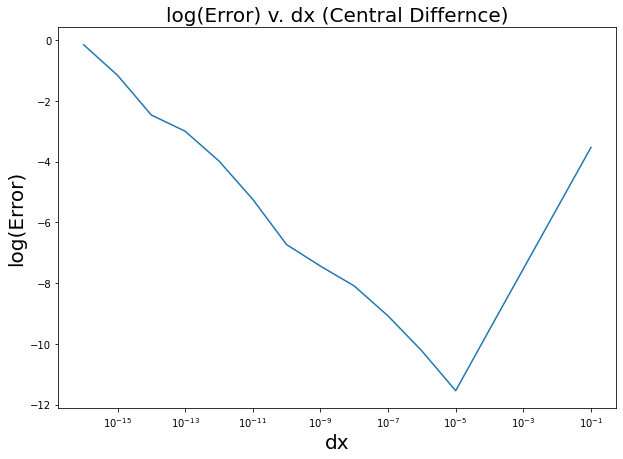

In [7]:
def centralDifference(f, x, dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

def error(analytic, numerical):
    return math.log10(np.abs(analytic - numerical))

evalPoint = np.pi/4

x = np.logspace(-16,-1,16)
y = centralDifference(np.cos, evalPoint, x)
error = np.log10(np.abs(y + np.sin(evalPoint)))

font = 20
plt.figure(figsize = (10, 7))
plt.title('log(Error) v. dx (Central Differnce)', size = font)
plt.ylabel('log(Error)', size = font)
plt.xlabel('dx', size = font)
plt.xscale('log')
plt.plot(x, error) 
plt.show()

In [8]:
yMax = error[-1]
xMax = x[-1]

minIndex = error.argmin()
yMin = error[minIndex]
xMin = x[minIndex]

n = (yMax - yMin)/(np.log10(xMax) - np.log10(xMin))

print('The value of n in dx^n is ', n)
print('The optimal value of dx is ', xMin)
print('The error at the optimal dx is ', 10**yMin)

The value of n in dx^n is  2.0031610674796783
The optimal value of dx is  1e-05
The error at the optimal dx is  2.8613778013664196e-12


We can see that the central difference scheme is better since the error at the optimal dx is two orders of magnitude smaller than the forward difference scheme

## Part 3

<ipython-input-9-cb36fc299e24>:11: RuntimeWarning: divide by zero encountered in log10
  error = np.log10(np.abs(y + np.sin(evalPoint)))


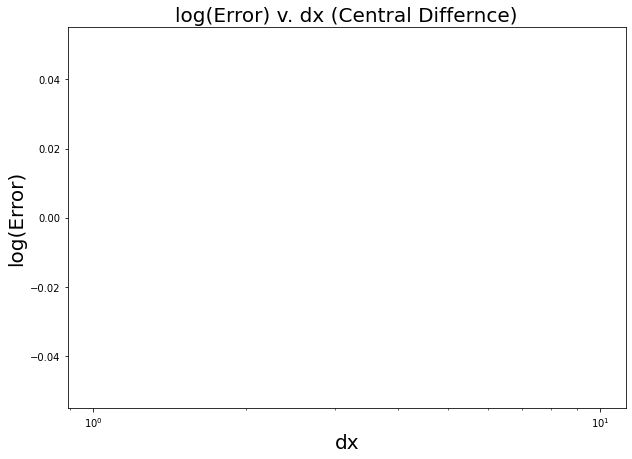

In [9]:
def centralDifference(f, x, dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

def error(analytic, numerical):
    return math.log10(np.abs(analytic - numerical))

evalPoint = 0

x = np.logspace(-16,-1,100)
y = centralDifference(np.cos, evalPoint, x)
error = np.log10(np.abs(y + np.sin(evalPoint)))

font = 20
plt.figure(figsize = (10, 7))
plt.title('log(Error) v. dx (Central Differnce)', size = font)
plt.ylabel('log(Error)', size = font)
plt.xlabel('dx', size = font)
plt.xscale('log')
plt.plot(x, error) 
plt.show()

We can see that there is an error due to the fact that $log_{10}(0) = -\infty$. 
This arises since sin is antisymetric around the point zero. Thus if we calculate $sin(x)$ and $sin(-x)$ and subtract we get

$$ sin(x) - sin(-x) = sin(x) - sin(x) = 0 $$

Therefore we are subtracting two very close numbers and the result is purely due to round off errors, which
are close enough to 0 that, 0 is entered into our equation.

Another important note is that the error of central difference is given by

$$ a_1 y^{(3)} + a_2 y^{(5)} + a_3 y^{(7)} + ... + a_n y^{(2n+1)} $$

where $a_n$ coefficents.

However we can see that all of the error terms are odd derivatives of y. 
This means that every one of the terms in the error approximation has a sin and then we input x = 0 into each.
Thus since sin(0) is 0 analytically, we get that the error due to the size of dx is nothing,
and thus only round off errrors are present.

To check that the error due to small dx is no present, the followin block plots the value of sin(0) vs dx
over a range from (10^-20, 10^20) for dx. We see that the roundoff error is small enough that python
considers it to be zero.

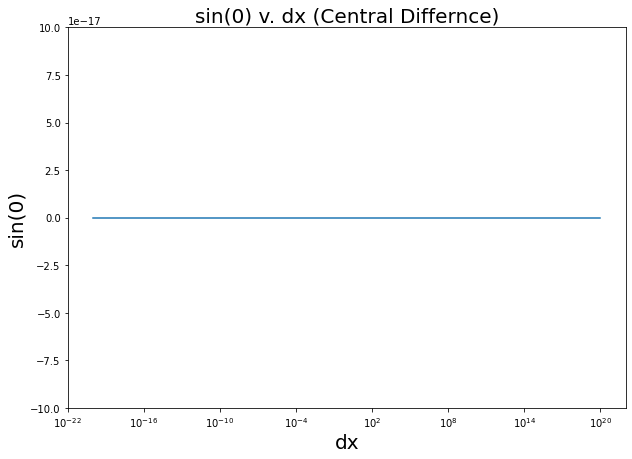

In [10]:
def centralDifference(f, x, dx):
    return (f(x+dx/2)-f(x-dx/2))/dx

def error(analytic, numerical):
    return math.log10(np.abs(analytic - numerical))

evalPoint = 0

x = np.logspace(-20,20,1000)
y = centralDifference(np.cos, evalPoint, x)
#error = np.log10(np.abs(y + np.sin(evalPoint)))

font = 20
plt.figure(figsize = (10, 7))
plt.title('sin(0) v. dx (Central Differnce)', size = font)
plt.ylim(-1e-16,1e-16)
plt.ylabel('sin(0)', size = font)
plt.xlabel('dx', size = font)
plt.xscale('log')
plt.plot(x, y) 
plt.show()